<a href="https://colab.research.google.com/github/Pager07/FinalYearProject/blob/master/ImageRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project LadderBoard

- Downloading the data
- Importing (DONE)
  - Fastai (DONE)
  - google drive (DONE) 
- Understanding the data
  - Loading the data
      - set up (DONE)
        - root_dir (PATH TO Main Project Folder) (DONE)
        - base_dir (Path to data folder) (DONE)
    - Loading Images (DONE)
    - Loading Points (DONE)
- Creating Dataobject (DONE) 
- Creating Databunch (DONE)
- Creating  Learner 
  - Find Best LR
- Fit 

# Importing FastAi Library

In [0]:
#Reload an IPython extension by its module name.
%reload_ext autoreload
#2 is the code to reload ALL modules before running any code cell
%autoreload 2 
%matplotlib inline

from fastai.vision import *

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount = True);

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Understanding the data

In [0]:
root_dir = '/content/gdrive/My Drive/My Notes/3rd year/Individual Projects' 
base_dir = root_dir + '/Data'
path = Path(base_dir)


In [0]:
img = open_image(path/'train'/'46,97.png')

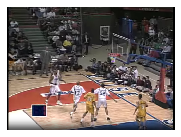

In [12]:
img.show()

#Creating DataObject, DataLoader and DataBunch

In [0]:
transforms = get_transforms(do_flip=True)

In [0]:
def get_points(filePath):
  coordList = str(filePath).split('/')[-1].split('.')[0].split(',')
  coordList = list(map(int, coordList));coordList
  coordTensor = tensor(coordList).flip(0);
  return coordTensor

In [17]:
#TEST get_points
#From sc: This is what is being passed to label_from_func
#imageList.items[0]

PosixPath('/content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data/train/159,41.png')

In [33]:
#TEST get_points
coordList = str(imageList.items[0]).split('/')[-1].split('.')[0].split(',')
coordList = list(map(int, coordList));coordList
coordTensor = tensor(coordList).flip(0);coordTensor

tensor([ 41, 159])

In [38]:
#This is the dataobject
imageList  = PointsItemList.from_folder(path)
imageList = imageList.split_by_folder(train='train' , valid='valid').label_from_func(get_points);imageList


LabelLists;

Train: LabelList (668 items)
x: PointsItemList
Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490)
y: PointsLabelList
ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490)
Path: /content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data;

Valid: LabelList (434 items)
x: PointsItemList
Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490),Image (3, 360, 490)
y: PointsLabelList
ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490),ImagePoints (360, 490)
Path: /content/gdrive/My Drive/My Notes/3rd year/Individual Projects/Data;

Test: None

In [0]:
data = imageList.transform(tfms=transforms , tfm_y = True , size=(120,160))

In [0]:
data = data.databunch(bs = 64).normalize(imagenet_stats);